In [5]:
import matplotlib
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
from matplotlib.cm import rainbow
from PreFRBLE.convenience import *
from PreFRBLE.likelihood import *
from PreFRBLE.physics import *
from PreFRBLE.plot import *


In [2]:
model = 'Rodrigues18/smd'
model_inter = 'Rodrigues18'

N_z, N_bins = 60, 100  ## number of redshift bins and bins in likelihood functions
zs = redshift_bins

In [3]:
with h5.File( likelihood_file_telescope) as f:
    print( f['parkes/smd/primordial/Rodrigues18/Rodrigues18/smd/Piro18/wind/'].keys() )

<KeysViewHDF5 ['DM', 'RM']>


/data/PreFRBLE/PreFRBLE_venv/lib/python3.4/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


compare with Kierdorf et al.

Text(0.5,1,'M51 observed S-band')

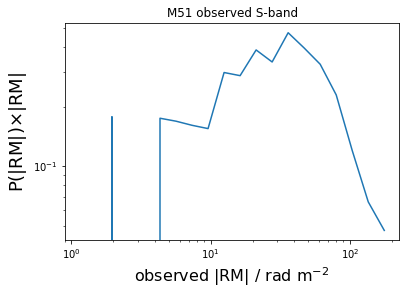

In [22]:
RM_M51 = np.genfromtxt('../../downloads/M51_RM_Sband.txt')
P, x = histogram( np.abs(RM_M51)[RM_M51 != 0.0], log=True, bins=20, density=True, range=[1,200] )
PlotLikelihood( x, P, measure='RM' )
plt.title( 'M51 observed S-band')



$\text{ Intervening Galaxies}$

combine raw likelihood functions of intervening galaxies in redshift bin to likelihood function of source. This is done by adding probabilities of different bins, weighted by the probability to intersect galaxy in that bin.

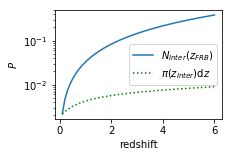

In [3]:
### plot likelihood for galaxies at redshift to intersect LoS, n_inter, which is used to weigh the redshift bins
### as well as expectet number of galaxies in LoS to source, N_inter

fig, ax = plt.subplots( figsize=(3,2) )

## values adopted from Marcquart & Koay 2013
n_gal = 0.02*hubble_constant**3   ### choose n(z) according to merger tree !!!
r_gal = 0.01/hubble_constant      ### choose r(z) ???


pi_inter = PriorInter( redshift_bins[-1], r=r_gal, n=n_gal )
n_inter = nInter( redshift_bins[-1], r=r_gal, n=n_gal )
N_inter = NInter( redshift_bins[-1], r=r_gal, n=n_gal )

plt.plot( redshift_bins, N_inter, label=r"$N_{Inter}(z_{FRB})$" )
plt.plot( redshift_bins, n_inter, linestyle=':', label=r"$\pi(z_{Inter})$d$z$", color='green' )
plt.xlabel('redshift')
plt.ylabel(r"$P$")
plt.yscale( 'log')
plt.legend()

weights = n_inter
norms = np.cumsum(weights)
redshift_L = redshift_bins - np.diff(redshift_range)/2


read out raw data of Rodrigues et al. 2018

In [11]:
import pandas as pd
raw_data = pd.read_csv('../likelihood/Rodrigues18_RM_intervening.csv', sep=',',)

#raw_data = np.genfromtxt('../likelihood/Rodrigues18_RM_intervening.csv', delimiter=',', )

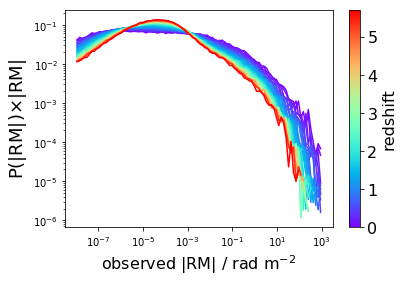

In [73]:

cols = raw_data.columns
redshifts_inter = np.round(cols[1:].astype('f'),2)
xx = 10.**raw_data[cols[0]]     ## central bin values given in raw data file
x = 10.**np.linspace(-8,3,101)  ## corresponding bin ranges
dx = np.diff(x)
fig, ax = plt.subplots()
#fig, axs = plt.subplots(1,2, figsize=(8,3), sharey=True)
#ax=axs[0]
for col, color in zip( cols[1:], Rainbow(redshifts_inter) ):
    P = raw_data[col] #/dx
    pdf = P/dx
    PlotLikelihood( x, pdf, ax=ax, color=color, measure='RM' )
#    axs[1].loglog( xx, P, color=color )
#plt.xlabel( 'RM / %s' % units['RM'])
#plt.ylabel('P')
Colorbar( redshifts_inter, label='redshift')

/data/PreFRBLE/PreFRBLE_venv/lib/python3.4/site-packages/PreFRBLE/convenience.py:118: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5.File( likelihood_file_galaxy ) as f:
/data/PreFRBLE/PreFRBLE_venv/lib/python3.4/site-packages/PreFRBLE/convenience.py:119: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  P = f[ KeyInter( redshift=redshift, model=model, measure=measure, axis='P' ) ].value
/data/PreFRBLE/PreFRBLE_venv/lib/python3.4/site-packages/PreFRBLE/convenience.py:120: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  x = f[ KeyInter( redshift=redshift, model=model, measure=measure, axis='x' ) ].value


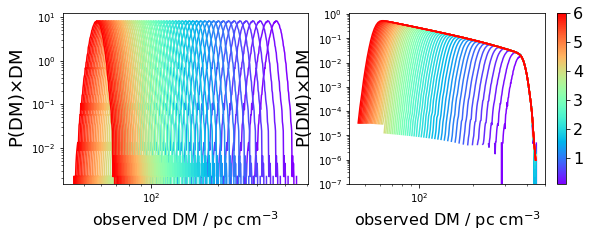

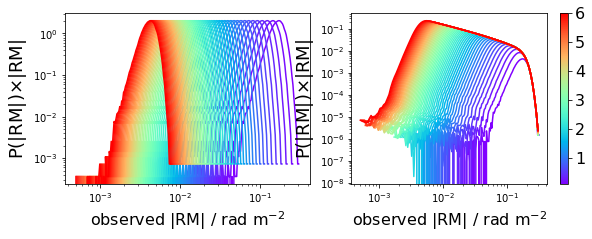

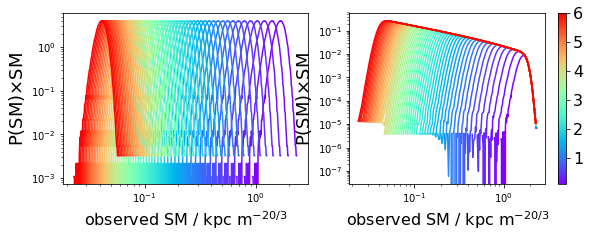

In [6]:
measures = [ 'DM', 'RM', 'SM' ]  ## scattering time needs special treatment in own notebook

fig, axs1 = plt.subplots( 1, 2, figsize=(8,3))
Colorbar(redshift_bins)
fig.tight_layout()
fig, axs2 = plt.subplots( 1, 2, figsize=(8,3))
Colorbar(redshift_bins)
fig.tight_layout()
fig, axs3 = plt.subplots( 1, 2, figsize=(8,3))
Colorbar(redshift_bins)
fig.tight_layout()
axs = [ axs1, axs2, axs3 ]

for measure, axs in zip( measures, axs ):
    for i_s, (z_s, color) in enumerate( zip( redshift_bins, rainbow( np.linspace(0,1,len(redshift_bins)) ) ) ):
        Ps, xs = [], []
        for i_L , (z_L, color_L) in enumerate( zip( redshift_L[:i_s+1], rainbow( np.linspace(0,1,len(redshift_bins)) ) ) ):
            ### read raw P(DM_Inter|z_L) for all z_L <= z_s
            P, x = GetLikelihood_Inter( redshift=redshift_bins[i_L], model=model_inter+'/raw', measure=measure)
            if i_s == len(redshift_bins) - 1:
                PlotLikelihood( x, P, measure=measure, color=color_L, ax=axs[0] )
            Ps.append(P)
            xs.append(x)
        ### integrate results for all intervening redshifts, weighing and renormalizing with differential and cumulative intersection probability, respectively
        P, x = LikelihoodsAdd( Ps, xs, weights=weights[:i_s+1], renormalize=norms[i_s] )
        PlotLikelihood( x, P, measure=measure, color=color, ax=axs[1] )
        Write2h5( filename=likelihood_file_galaxy, datas=[P,x], 
                 keys=[ KeyInter( redshift=z_s, model=model_inter, measure=measure, axis=axis) for axis in ['P','x'] ] 
                )

plt.show()


create fake galaxy results for tests

1.0


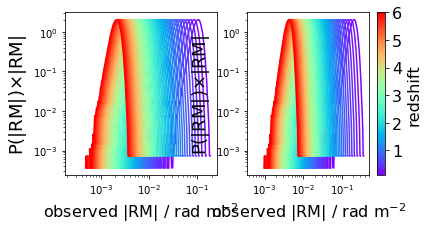

In [12]:
RM_0 = 0.1 # rad m^-2
sigma = 0.2 # log-scaled deviation

#RMs = np.random.lognormal(mean=RM_0, sigma=sigma, size=100000)
RMs = np.random.normal(loc=RM_0, scale=sigma/10, size=100000)


colors = rainbow( np.linspace( 0, 1, len(zs)+1 ) )


fig, axs = plt.subplots( 1, 2, figsize=(6,3))

P, x = histogram( data=RMs, bins=N_bins, density=True, log=True)
PlotLikelihood( x, P,  measure='RM', color=colors[0], ax=axs[0])
#'''
x_ = x*2  # rough estimate for intervening galaxies
P_ = P/ np.sum( P*np.diff(x_) )
print np.sum( P_*np.diff(x_) )
        
PlotLikelihood( x_, P_,  measure='RM', color=colors[0], ax=axs[1])
#'''
for z, color in zip( zs, colors[1:] ):
    P_ = P*(1+z)**2
    x_ = x/(1+z)**2
    PlotLikelihood( x_, P_,  measure='RM', color=color, ax=axs[0])
    Write2h5( likelihood_file_galaxy, [P_, x_], [KeyHost( redshift=z, model='Rodrigues18/smd', measure='RM', axis=axis) for axis in ['P','x'] ] )
    x_ *= 2  # rough estimate for intervening galaxies
    P_ /= np.sum( P_*np.diff(x_) )
    if not np.round( np.sum( P_*np.diff(x_) ), 4) == 1.:
        print np.sum( P_*np.diff(x_) )
    PlotLikelihood( x_, P_,  measure='RM', color=color, ax=axs[1])
    Write2h5( likelihood_file_galaxy, [P_, x_], [KeyInter( redshift=z, model='Rodrigues18/raw', measure='RM', axis=axis) for axis in ['P','x'] ] )
    
#mp = plt.imsave( 'imsave.png', zs.reshape([len(zs),1]), cmap=rainbow )

Colorbar( zs, label='redshift' ) #, position=[0.5,0.15,0.05,0.7] )


1.0


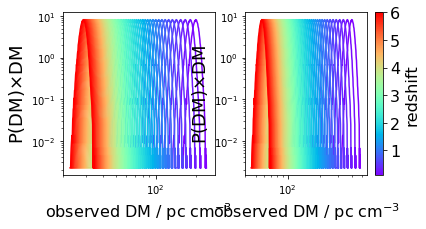

In [13]:
DM_0 = 200 # pc cm^-3
sigma = 10. # log-scaled deviation

DMs = np.random.normal(loc=DM_0, scale=sigma, size=100000)


colors = rainbow( np.linspace( 0, 1, len(zs)+1 ) )


fig, axs = plt.subplots( 1, 2, figsize=(6,3))

P, x = histogram( data=DMs, bins=N_bins, density=True, log=True)
PlotLikelihood( x, P,  measure='DM', color=colors[0], ax=axs[0])
#'''
x_ = x*2  # rough estimate for intervening galaxies
P_ = P/ np.sum( P*np.diff(x_) )
print np.sum( P_*np.diff(x_) )
        
PlotLikelihood( x_, P_,  measure='DM', color=colors[0], ax=axs[1])
#'''
for z, color in zip( zs, colors[1:] ):
    P_ = P*(1+z)
    x_ = x/(1+z)
    PlotLikelihood( x_, P_,  measure='DM', color=color, ax=axs[0])
    Write2h5( likelihood_file_galaxy, [P_, x_], [KeyHost( redshift=z, model='Rodrigues18/smd', measure='DM', axis=axis) for axis in ['P','x'] ] )
    x_ *= 2  # rough estimate for intervening galaxies
    P_ /= np.sum( P_*np.diff(x_) )
    if not np.round( np.sum( P_*np.diff(x_) ), 4) == 1.:
        print np.sum( P_*np.diff(x_) )
    PlotLikelihood( x_, P_,  measure='DM', color=color, ax=axs[1])
    Write2h5( likelihood_file_galaxy, [P_, x_], [KeyInter( redshift=z, model='Rodrigues18/raw', measure='DM', axis=axis) for axis in ['P','x'] ] )
    
#mp = plt.imsave( 'imsave.png', zs.reshape([len(zs),1]), cmap=rainbow )

Colorbar( zs, label='redshift' ) #, position=[0.5,0.15,0.05,0.7] )


1.0


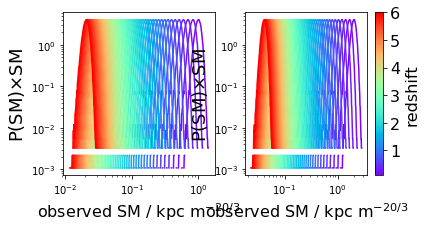

In [14]:
SM_0 = 1 # kpc m^-20/3
sigma = 0.1 # deviation

SMs = np.random.normal(loc=SM_0, scale=sigma, size=100000)


colors = rainbow( np.linspace( 0, 1, len(zs)+1 ) )


fig, axs = plt.subplots( 1, 2, figsize=(6,3))

P, x = histogram( data=SMs, bins=N_bins, density=True, log=True)
PlotLikelihood( x, P,  measure='SM', color=colors[0], ax=axs[0])
#'''
x_ = x*2  # rough estimate for intervening galaxies
P_ = P/ np.sum( P*np.diff(x_) )
print np.sum( P_*np.diff(x_) )
        
PlotLikelihood( x_, P_,  measure='SM', color=colors[0], ax=axs[1])
#'''
for z, color in zip( zs, colors[1:] ):
    P_ = P*(1+z)**2
    x_ = x/(1+z)**2
    PlotLikelihood( x_, P_,  measure='SM', color=color, ax=axs[0])
    Write2h5( likelihood_file_galaxy, [P_, x_], [KeyHost( redshift=z, model='Rodrigues18/smd', measure='SM', axis=axis) for axis in ['P','x'] ] )
    x_ *= 2  # rough estimate for intervening galaxies
    P_ /= np.sum( P_*np.diff(x_) )
    if not np.round( np.sum( P_*np.diff(x_) ), 4) == 1.:
        print np.sum( P_*np.diff(x_) )
    PlotLikelihood( x_, P_,  measure='SM', color=color, ax=axs[1])
    Write2h5( likelihood_file_galaxy, [P_, x_], [KeyInter( redshift=z, model='Rodrigues18/raw', measure='SM', axis=axis) for axis in ['P','x'] ] )
    
#mp = plt.imsave( 'imsave.png', zs.reshape([len(zs),1]), cmap=rainbow )

Colorbar( zs, label='redshift' ) #, position=[0.5,0.15,0.05,0.7] )


1.0


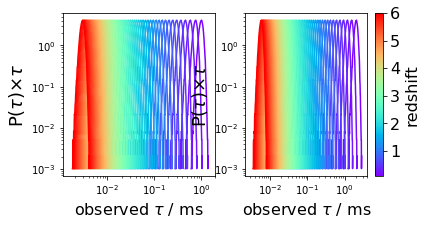

In [15]:
tau_0 = 1 #  ms
sigma = 0.1 # deviation

taus = np.random.normal(loc=tau_0, scale=sigma, size=100000)


colors = rainbow( np.linspace( 0, 1, len(zs)+1 ) )


fig, axs = plt.subplots( 1, 2, figsize=(6,3))

P, x = histogram( data=taus, bins=N_bins, density=True, log=True)
PlotLikelihood( x, P,  measure='tau', color=colors[0], ax=axs[0])
#'''
x_ = x*2  # rough estimate for intervening galaxies
P_ = P/ np.sum( P*np.diff(x_) )
print np.sum( P_*np.diff(x_) )
        
PlotLikelihood( x_, P_,  measure='tau', color=colors[0], ax=axs[1])
#'''
for z, color in zip( zs, colors[1:] ):
    P_ = P*(1+z)**3
    x_ = x/(1+z)**3
    PlotLikelihood( x_, P_,  measure='tau', color=color, ax=axs[0])
    Write2h5( likelihood_file_galaxy, [P_, x_], [KeyHost( redshift=z, model='Rodrigues18/smd', measure='tau', axis=axis) for axis in ['P','x'] ] )
    x_ *= 2  # rough estimate for intervening galaxies
    P_ /= np.sum( P_*np.diff(x_) )
    if not np.round( np.sum( P_*np.diff(x_) ), 4) == 1.:
        print np.sum( P_*np.diff(x_) )
    PlotLikelihood( x_, P_,  measure='tau', color=color, ax=axs[1])
    Write2h5( likelihood_file_galaxy, [P_, x_], [KeyInter( redshift=z, model='Rodrigues18/raw', measure='tau', axis=axis) for axis in ['P','x'] ] )
    
#mp = plt.imsave( 'imsave.png', zs.reshape([len(zs),1]), cmap=rainbow )

Colorbar( zs, label='redshift' ) #, position=[0.5,0.15,0.05,0.7] )


This following is not needed, since all the info is already incoded in results of Rodrigues et al.

In [2]:
def Schechter( M, M_star=1, phi1=1, alpha1=1, phi2=1, alpha2=1):
    return ( phi1 * ( M / M_star )**alpha1 + phi2 * ( M / M_star )**alpha2 ) * np.exp( -M/M_star ) / M_star

In [3]:
## Best fit parameters from Davidzon et al. 2017, Tab. 1, redshifts are extended to z=0 and z=6
parameters = np.genfromtxt( 'COSMOS2015_Schechter_fit.txt', names=True)
parameters['M_star'] = 10.**parameters['M_star']

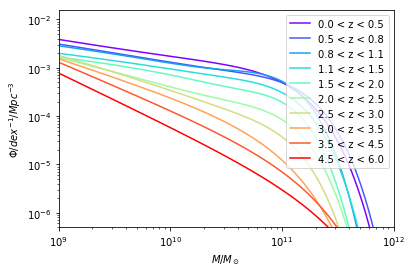

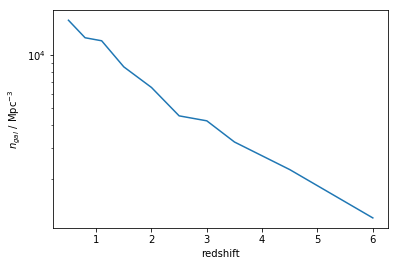

In [17]:
Ms = 10.**np.linspace(9,12,101)
dMs = np.diff(Ms)
n_gal = []
colors = rainbow( np.linspace( 0, 1, len(parameters) ) )
for p, c in zip( parameters, colors ):
    phi = Schechter( Ms, M_star=p['M_star']*1.067, phi1=p['phi1'], alpha1=p['alpha1'], phi2=p['phi2'], alpha2=p['alpha2']) 
    ### correct unit prefactors !!!
    n_gal.append( np.sum( phi[:-1]*dMs ) )
    plt.loglog( Ms[:-1]+dMs/2, phi[:-1]*dMs/110.2, label='%.1f < z < %.1f' % ( p['z0'], p['z1'] ), color=c )
plt.legend()
plt.xlabel('$M/M_\odot$')
plt.ylabel('$\Phi/dex^{-1}/Mpc^{-3}$')
plt.ylim(10.**-6.3, 10.**-1.8)
plt.xlim(1e9, 1e12)
plt.show()

plt.plot( parameters['z1'], n_gal )
plt.ylabel('$n_{gal}$ / Mpc$^{-3}$')
plt.xlabel('redshift')
plt.yscale('log')
plt.show()

In [13]:
len(parameters)


10

In [17]:
import yt
co = yt.utilities.cosmology.Cosmology()
radial_distance = co.comoving_radial_distance